In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
insurance_data = pd.read_csv('medical_cost_insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.head()
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Check for missing values
insurance_data.isnull().sum()

# Convert categorical variables to numerical using one-hot encoding
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

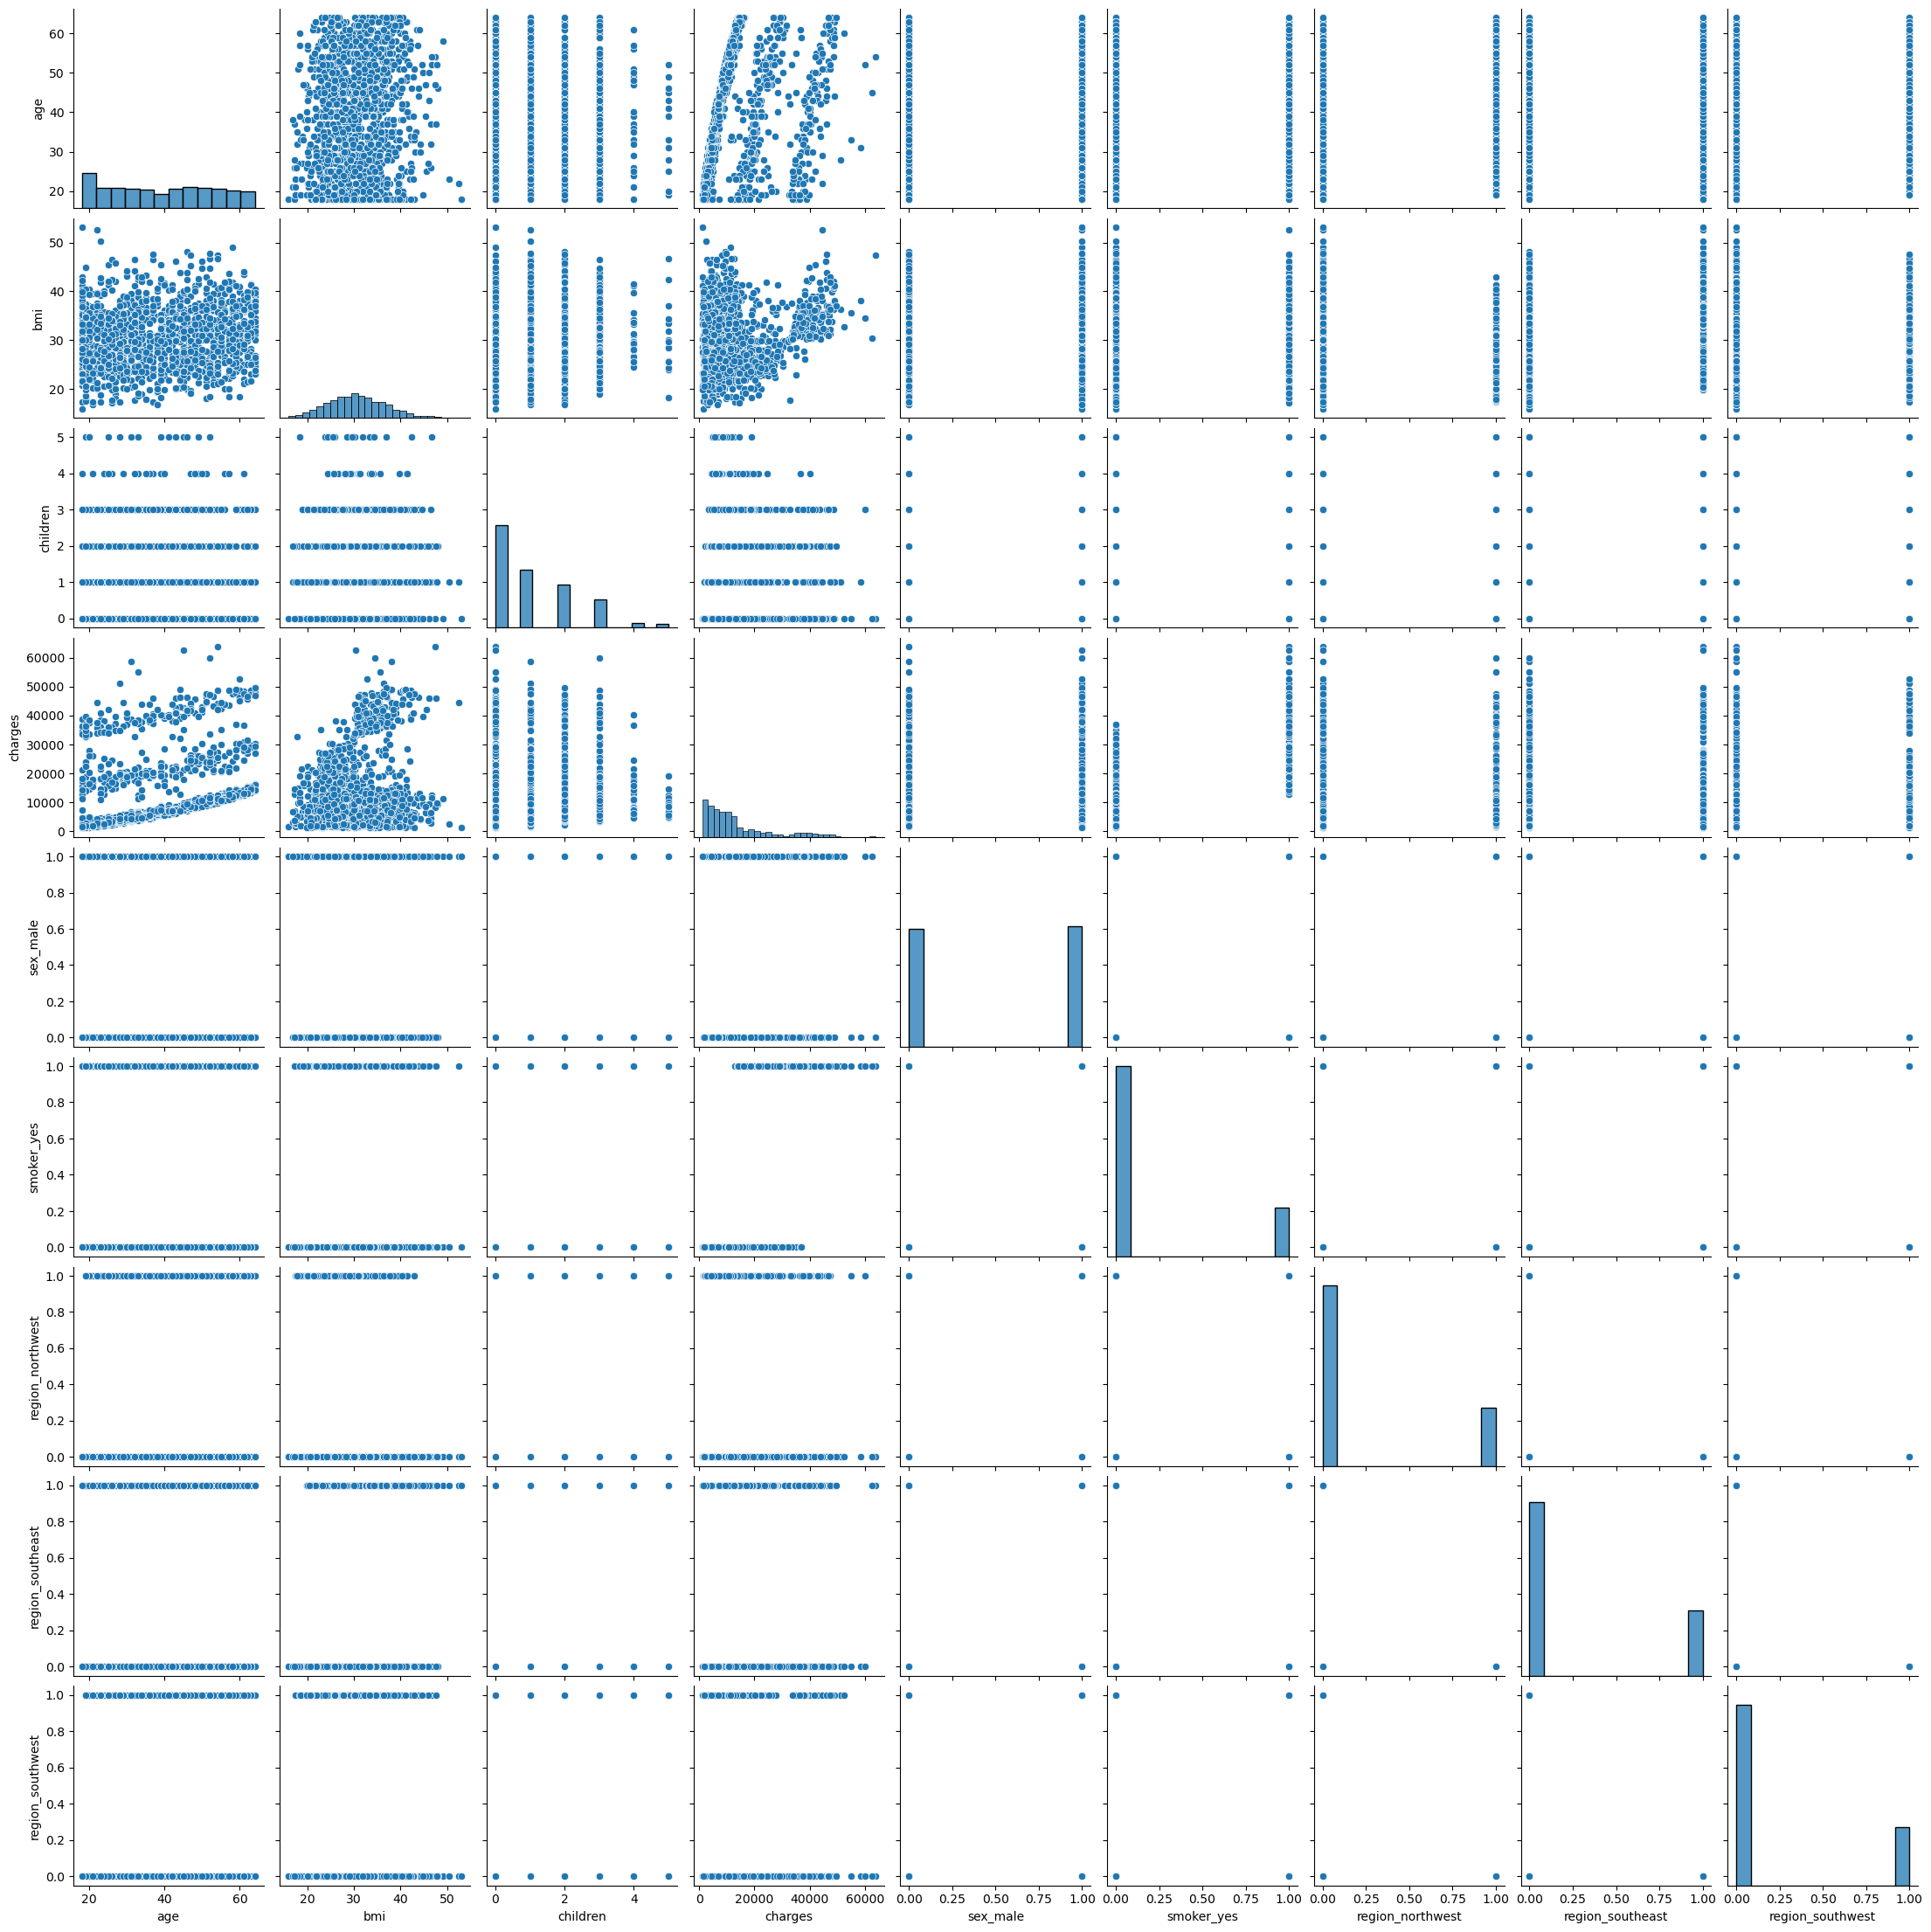

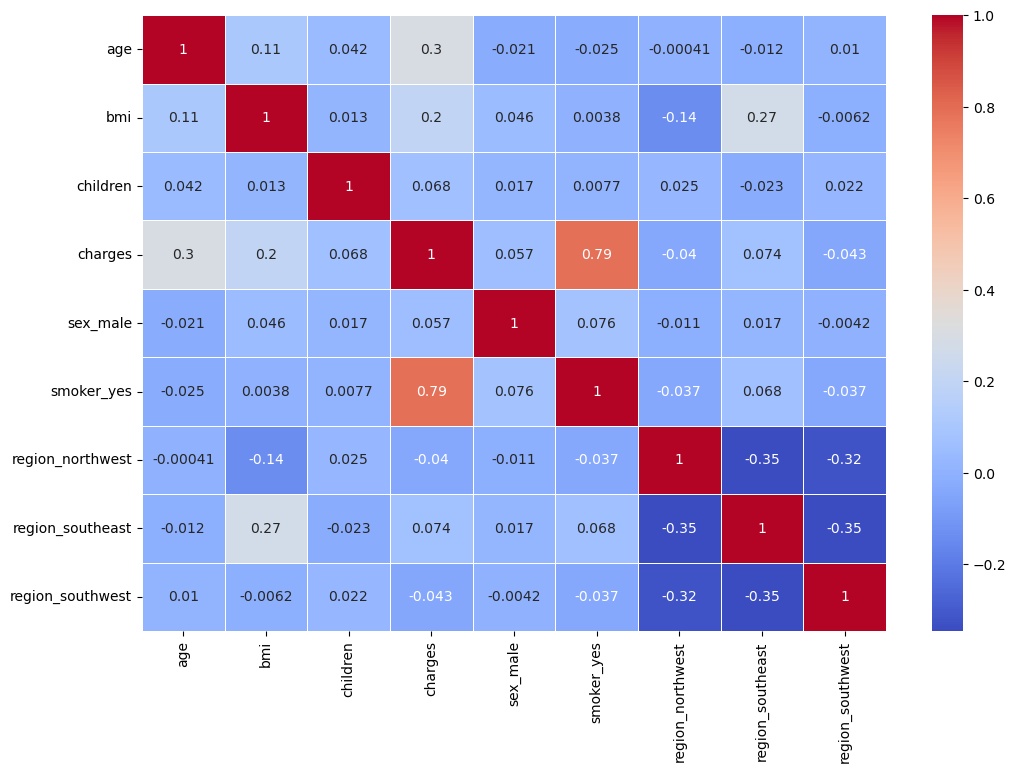

In [7]:
# Explore relationships between variables using visualizations (e.g., pairplot, correlation heatmap)
sns.pairplot(insurance_data)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [8]:
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 4181.19
Mean Squared Error: 33596915.85
R^2 Score: 0.78


In [11]:
# Interpret the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

           Variable   Coefficient
0               age    256.975706
1               bmi    337.092552
2          children    425.278784
3          sex_male    -18.591692
4        smoker_yes  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


In [12]:
# Make predictions on new data
new_data = pd.DataFrame({
    'age': [30],
    'bmi': [25],
    'children': [2],
    'sex_male': [1],
    'smoker_yes': [0],
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})

prediction = model.predict(new_data)
print(f"Predicted Insurance Cost: ${prediction[0]:.2f}")

Predicted Insurance Cost: $4379.47
